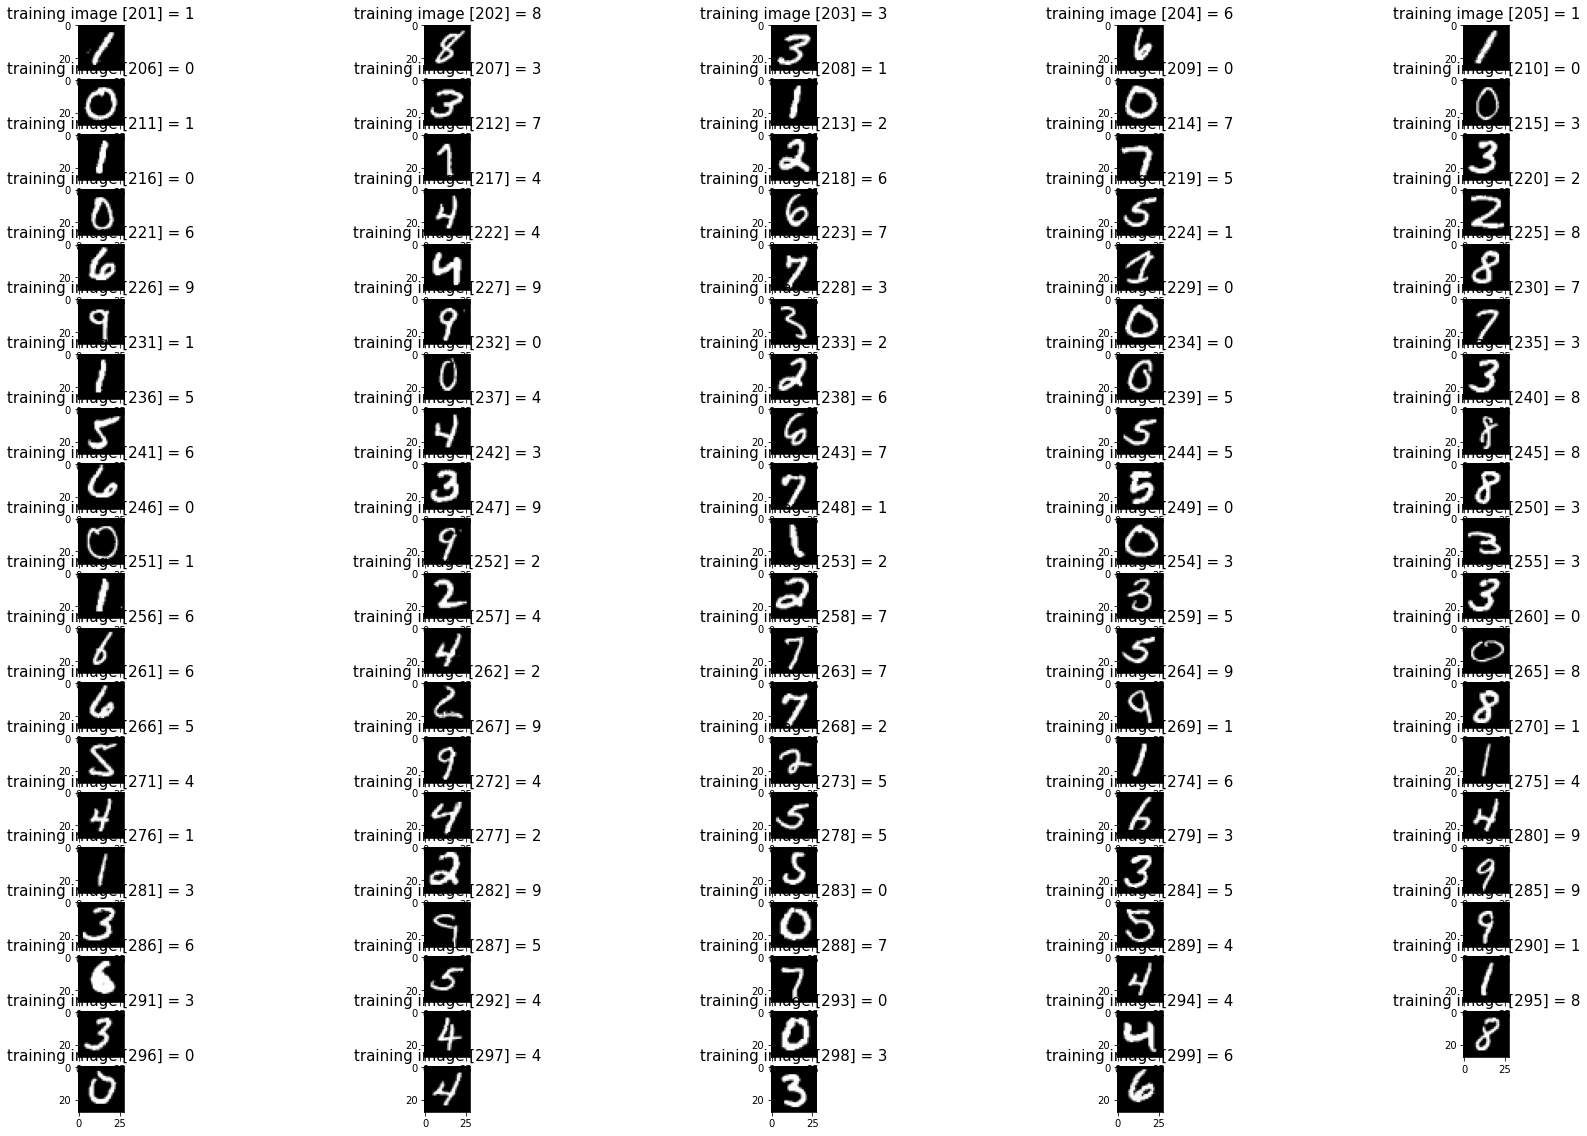

In [165]:
#
# This is a sample Notebook to demonstrate how to read "MNIST Dataset"
#
import numpy as np
import struct
from array import array
from os.path import join
import os
import random
import matplotlib.pyplot as plt


#
# MNIST Data Loader Class
#
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)  
		
		
#
# Verify Reading Dataset via MnistDataloader class
#
#
# Set file paths based on added MNIST Datasets
#
cwd = os.getcwd()
input_path = cwd + '/MNIST'
training_images_filepath = ('/Users/amirzaushnizer/desktop/DS_02/MNIST/train-images.idx3-ubyte')
training_labels_filepath = ('/Users/amirzaushnizer/desktop/DS_02/MNIST/train-labels.idx1-ubyte')
test_images_filepath = ('/Users/amirzaushnizer/desktop/DS_02/MNIST/t10k-images.idx3-ubyte')
test_labels_filepath = ('/Users/amirzaushnizer/desktop/DS_02/MNIST/t10k-labels.idx1-ubyte')

#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1
    plt.show()
#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

#
# Show some random training and test images 
#
images_2_show = []
titles_2_show = []
for i in range(201, 300):
#    r = random.randint(1, 60000)
    images_2_show.append(x_train[i])
    titles_2_show.append('training image [' + str(i) + '] = ' + str(y_train[i]))    

#for i in range(0, 5):
#    r = random.randint(1, 10000)
#    images_2_show.append(x_test[r])        
#    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))    

show_images(images_2_show, titles_2_show)

Data normalization

In [166]:
def normalizeImage(image):
    image = image.astype(np.float64)
    image/=255
    image = image.reshape((1,28*28))
    return image
        
data = list(map(lambda x : normalizeImage(np.vstack(x)),x_train)) 
data = list(zip(data,y_train))
test_data = list(map(lambda x : normalizeImage(np.vstack(x)),x_test))
test_data = list(zip(test_data,y_test))

Implementation of Kmeans algorithm

In [167]:
#generate random centers
def generateCentroid():
    return np.random.rand(28*28)

In [168]:
def findNearestCentroid(image,centers):
    closest = centers[0]
    index = 0
    for i,center in enumerate(centers):
        if ((np.linalg.norm(image-center))**2<(np.linalg.norm(image-closest))**2):
            closest = center 
            index = i
    return index

In [169]:
def updateCenter(cluster):
    vecs = list(map(lambda x : x[0],cluster))
    sumOfx = sum(vecs)
    return sumOfx/len(cluster)

In [170]:
def Kmeans(k):
    centroids = []
    prev = []
    for i in range(k):
        centroids.append(generateCentroid())
    while (prev != centroids):
        clusters = []
        for i in range(k):
            clusters.append([])
        prev = centroids.copy()
        for l in range(len(data)):
            nearest = findNearestCentroid(data[l][0],centroids)
            
            clusters[nearest].append(data[l])
        
        for j in range(k):
            if (len(clusters[j])>0):
                centroids[j] = updateCenter(clusters[j])
        
        
        return (clusters,centroids)
    
    
        

Section b:

In [171]:
a,b = Kmeans(10)

Section c:

In [172]:
def most_frequent(List): 
    dict = {} 
    count, itm = 0, '' 
    for item in reversed(List): 
        dict[item] = dict.get(item, 0) + 1
        if dict[item] >= count : 
            count, itm = dict[item], item 
    return(itm) 

In [173]:
def getClusterLables(clusters):
    output = []
    for cluster in clusters:
        if(len(cluster)>0):
            lables = list(map(lambda x:x[1],cluster))
            result = most_frequent(lables)
            output.append(result)
        else: 
            output.append("none")
    return output   

In [174]:
clusterLables = getClusterLables(a)
i=0
for lable in clusterLables:
    print(f"cluster number {i} is represented by lable {lable}")
    i = i+1
    

cluster number 0 is represented by lable 2
cluster number 1 is represented by lable 3
cluster number 2 is represented by lable 0
cluster number 3 is represented by lable 0
cluster number 4 is represented by lable 0
cluster number 5 is represented by lable 7
cluster number 6 is represented by lable 6
cluster number 7 is represented by lable 2
cluster number 8 is represented by lable 1
cluster number 9 is represented by lable 3


Sections d and e : 
we will run the algorithm 3 times and report success rates each time. 

In [175]:
def classify(testData):
    predictions = list(map(lambda x : clusterLables[findNearestCentroid(x[0],b)],testData))
    return predictions
    
    
    

In [176]:
def getSuccessPerc(pred,real):
    count = 0
    for i in range(len(pred)):
        if(pred[i]==real[i]):
            count = count +1
    return (count/len(pred))*100 
            
    

In [177]:
for i in range(3):
    a,b = Kmeans(10)
    clusterLables = getClusterLables(a)
    predict = classify(test_data)
    print(f"iteration {i+1} has success rate of {getSuccessPerc(predict,y_test)}%")

iteration 1 has success rate of 27.96%
iteration 2 has success rate of 24.27%
iteration 3 has success rate of 34.61%


Section f

In [178]:
def Kmeans2(k):
    sexyList = [156,8,213,7,58,273,66,223,144,170]
    sexyList2 = [17968,59872,59855,17904,59862,59823,59873,59856,59884,59835]
    centroids = []
    prev = []
    for i in range(k):
        centroids.append(data[sexyList2[i]][0])
    while (prev != centroids):
        clusters = []
        for i in range(k):
            clusters.append([])
        prev = centroids.copy()
        for l in range(len(data)):
            nearest = findNearestCentroid(data[l][0],centroids)
            
            clusters[nearest].append(data[l])
        
        for j in range(k):
            if (len(clusters[j])>0):
                centroids[j] = updateCenter(clusters[j])
        
        
        return (clusters,centroids)
    
    
        

In [179]:
a,b = Kmeans2(10)
clusterLables = getClusterLables(a)
predict = classify(test_data)
print(f"iteration has success rate of {getSuccessPerc(predict,y_test)}%")

iteration has success rate of 61.99%
